In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

## 파일 불러오기

In [2]:
import os
path = '../../script'

# 다큐멘터리(0), 드라마(1), 영화(2) 선택
category = 2
if category == 0:
    path = path + '/Documentary'
elif category == 1:
    path = path + '/Drama'
else:
    path = path + '/Movie'

_list = os.listdir(path)

file_list = []
for file in _list:
    if file.startswith('.'): continue
    file_list.append(file)

file_list = sorted(file_list)
print(f'작품개수: {len(file_list)}')
# print([{i:_list[i]} for i in range(len(file_list))])
for index, title in enumerate(file_list):
    print(f'{index}: {title}')

작품개수: 41
0: About.Time
1: Arthur.Christmas
2: Baby.Driver
3: Bad.Boys
4: Bee.Movie
5: Ben.Platt.Live.from.Radio.City.Music.Hall
6: Constantine
7: Dolittle
8: Dracula.Untold
9: Enola.Holmes
10: How.to.Be.Single
11: In.Time
12: Inception
13: Interstellar
14: It_s.Complicated
15: Jumanji_.Welcome.to.the.Jungle
16: Kill.Bill_.Vol..1
17: Klaus
18: Kung.Fu.Panda
19: Kung.Fu.Panda.2
20: Kung.Fu.Panda.3
21: Madagascar_.Escape.2.Africa
22: Matilda
23: Monty.Python.and.the.Holy.Grail
24: Morning.Glory
25: Notting.Hill
26: Passengers
27: Penguins.of.Madagascar_.The.Movie
28: Prisoners
29: Second.Act
30: The.Accountant
31: The.Boy.in.the.Striped.Pajamas
32: The.Dark.Knight
33: The.Departed
34: The.Family.Man
35: The.Intern
36: The.Judge
37: The.Revenant
38: The.Truman.Show
39: There.Will.Be.Blood
40: Zodiac


### 작품 선택하기

In [3]:
# 바로 위 코드에서 file_list를 참고하여 작품 선택
title = file_list[20]

file_name = 'unique_words_' + title + '.WEBRip.Netflix.en[cc]'
print(f'{path}/{title}/{file_name}')

../../script/Movie/Kung.Fu.Panda.3/unique_words_Kung.Fu.Panda.3.WEBRip.Netflix.en[cc]


In [4]:
count_df = pd.read_csv(f'{path}/{title}/{file_name}.csv', index_col='word')
display(count_df.info(), count_df)

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, can to loved
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   counts  851 non-null    int64
dtypes: int64(1)
memory usage: 13.3+ KB


None

,counts
word,
can,46
just,42
go,38
here,36
know,32
...,...
embarrassing,1
emerge,1
empty,1


## count 모두 1로 초기화

In [5]:
count_df['counts'] = 1
count_df

,counts
word,
can,1
just,1
go,1
here,1
know,1
...,...
embarrassing,1
emerge,1
empty,1


## 변형형을 원형으로 변환후 다시 세기

In [6]:
# 단어 리스트 불러오기
pd.options.display.float_format = '{:.0f}'.format

word_db_df = pd.read_csv("../../words/final_datasets/words_levels_df.csv")
word_db_df
word_db_df.set_index('Word', inplace=True)

#변형어 리스트 불러오기
existing_lemmas = pd.read_csv('../../words/final_datasets/existing_lemmas_final.csv', index_col='Word')
lemmas_dict = {}
for index, row in existing_lemmas.iterrows():
  lemmas = row["Lemmas"].split(';')
  for lemma in lemmas:
    lemmas_dict[lemma] = str(index)

def convertToHeadForm(word):
  word = str(word)
  head = lemmas_dict.get(word)
  # If a lemma word, change to head word in word list
  if head:
    return head
  if word in word_db_df.index:
    return word
  else:
    # Check if adverb
    if word.endswith('ly'):
      if word[:-2] in word_db_df.index:
        print(word[:-2])
        return word[:-2]
      if word.endswith('ily'):
        if (word[:-3] + 'y') in word_db_df.index:
          print(word[:-3] + 'y')
          return word[:-3] + 'y'
      if word.endswith('ally'):
        if (word[:-4]) in word_db_df.index:
          print(word[:-4])
          return word[:-4]
      if (word[:-2] + 'e') in word_db_df.index:
        print(word[:-2] + 'e')
        return word[:-2] + 'e'
    return word

count_df.index = count_df.index.map(convertToHeadForm)
count_df

counts_df_headed = count_df.groupby(count_df.index).sum()
counts_df_headed.sort_values('counts', ascending=False, inplace=True)

counts_df_headed
# counts_df_headed.to_csv('test-about-time.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../words/final_datasets/words_df_word_level.csv'

In [ ]:
counts_df_headed['counts'] = 1
counts_df_headed

,counts
word,
take,1
work,1
come,1
think,1
make,1
...,...
grow,1
guess,1
hall,1


## Add columns to count df

In [ ]:
counts_df_headed_joined = counts_df_headed.join(word_db_df)

counts_df_headed_joined

,counts,oxford_level,oxford_version,lexile_grade,lexile_category,awsl,toefl,tsl,bsl,ngsl_freq,ngsl_sp_freq,naver_priority,lemmetized,proper_noun,word_level
word,,,,,,,,,,,,,,,
take,1,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
work,1,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
come,1,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
think,1,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
make,1,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grow,1,A1,3000,1,general,Y,N,N,N,A1,A1,2,True,False,1
guess,1,A1,3000,0,NN,Y,N,N,N,A1,A1,2,True,False,1
hall,1,A2,3000,0,NN,Y,N,N,N,A2,A2,2,True,False,1


# Group by categories

## Oxford, Lexile

In [ ]:
oxford = counts_df_headed_joined.groupby('oxford_level').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
oxford

oxford_result = oxford.to_frame(name='counts')
oxford_result = oxford_result.transpose()
oxford_result.rename({'counts': 'oxford'}, inplace=True)
# oxford_result.rename({'counts': 'oxford'}, inplace=True)
oxford_result.columns = range(1, len(oxford_result.columns)+1)
oxford_result.columns = [*oxford_result.columns[:-1], 'NN']

oxford_result

,1,2,3,4,5,NN
oxford,303,124,49,57,34,103


In [ ]:
oxford_ver = counts_df_headed_joined.groupby('oxford_version').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
oxford_ver = oxford_ver.to_frame(name='counts')
oxford_ver = oxford_ver.transpose()
oxford_ver.rename({'counts': 'oxford_ver'}, inplace=True)
oxford_ver.drop(0, axis=1, inplace=True)
oxford_ver

oxford_version,3000,5000
oxford_ver,510,57


In [ ]:
lexile = counts_df_headed_joined.groupby('lexile_grade').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
lexile
lexile = lexile.to_frame(name='counts')
lexile = lexile.transpose()
lexile.rename({'counts': 'lexile_grade'}, inplace=True)
lexile.drop(0, axis=1, inplace=True)

lexile

lexile_grade,1,2,3,4,5,6,9
lexile_grade,11,15,7,6,5,8,10


In [ ]:
lexile_cat = counts_df_headed_joined.groupby('lexile_category').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
lexile_cat = lexile_cat.to_frame(name='counts')
lexile_cat = lexile_cat.transpose()
lexile_cat.rename({'counts': 'lexile_cat'}, inplace=True)
lexile_cat.drop('NN', axis=1, inplace=True)
lexile_cat.rename(columns={'general': 1, 'math': 2, 'science': 3, 'social_studies': 4}, inplace=True)


lexile_cat

lexile_category,1,2,3,4
lexile_cat,22,3,15,22


## awsl, toefl, tsl, bsl

In [ ]:
awsl = counts_df_headed_joined.groupby('awsl').size()
# oxford.drop(oxford.columns.difference(['counts']), 1, inplace=True)
awsl
awsl = awsl.to_frame(name='counts')
awsl = awsl.transpose()
awsl.rename({'counts': 'awsl'}, inplace=True)
awsl.rename(columns={'N':'NN', 'Y':1}, inplace=True)
# awsl.columns = [1,2]
# awsl.drop(0, axis=1, inplace=True)

awsl

awsl,NN,1
awsl,260,410


In [ ]:
toefl = counts_df_headed_joined.groupby('toefl').size()
toefl
toefl = toefl.to_frame(name='counts')
toefl = toefl.transpose()
toefl.rename({'counts': 'toefl'}, inplace=True)
toefl.rename(columns={'N':'NN', 'Y':1}, inplace=True)
# toefl.drop(0, axis=1, inplace=True)

toefl

toefl,NN,1
toefl,606,64


In [ ]:
tsl = counts_df_headed_joined.groupby('tsl').size()
tsl
tsl = tsl.to_frame(name='counts')
tsl = tsl.transpose()
tsl.rename({'counts': 'tsl'}, inplace=True)
tsl.rename(columns={'N':'NN', 'Y':1}, inplace=True)
# tsl.drop(0, axis=1, inplace=True)

tsl

tsl,NN,1
tsl,643,27


In [ ]:
bsl = counts_df_headed_joined.groupby('bsl').size()
bsl
bsl = bsl.to_frame(name='counts')
bsl = bsl.transpose()
bsl.rename({'counts': 'bsl'}, inplace=True)
bsl.rename(columns={'N':'NN', 'Y':1}, inplace=True)
# bsl.drop(0, axis=1, inplace=True)

bsl

bsl,NN,1
bsl,643,27


## NGSL, NGSL-S

In [ ]:
ngsl_freq = counts_df_headed_joined.groupby('ngsl_freq').size()
ngsl_freq
ngsl_freq = ngsl_freq.to_frame(name='counts')
ngsl_freq = ngsl_freq.transpose()
ngsl_freq.rename({'counts': 'ngsl_freq'}, inplace=True)
ngsl_freq.columns = range(1, len(ngsl_freq.columns)+1)
ngsl_freq.columns = [*ngsl_freq.columns[:-1], 'NN']
# ngsl_freq.drop(0, axis=1, inplace=True)

ngsl_freq

,1,2,3,4,5,6,7,8,9,10,11,12,NN
ngsl_freq,341,117,51,20,61,28,11,20,14,2,2,1,2


In [ ]:
ngsl_sp_freq = counts_df_headed_joined.groupby('ngsl_sp_freq').size()
ngsl_sp_freq
ngsl_sp_freq = ngsl_sp_freq.to_frame(name='counts')
ngsl_sp_freq = ngsl_sp_freq.transpose()
ngsl_sp_freq.rename({'counts': 'ngsl_sp_freq'}, inplace=True)
ngsl_sp_freq.columns = range(1, len(ngsl_sp_freq.columns)+1)
ngsl_sp_freq.columns = [*ngsl_sp_freq.columns[:-1], 'NN']
# ngsl_sp_freq.drop(0, axis=1, inplace=True)

ngsl_sp_freq

,1,2,3,4,5,6,7,8,9,10,NN
ngsl_sp_freq,353,115,47,16,61,28,14,21,4,3,8


In [ ]:
naver_priority = counts_df_headed_joined.groupby('naver_priority').size()
naver_priority
naver_priority = naver_priority.to_frame(name='counts')
naver_priority = naver_priority.transpose()
naver_priority.rename({'counts': 'naver_priority'}, inplace=True)
naver_priority.rename(columns={0: 3, 1: 2, 2: 1, 3:0}, inplace=True)
# naver_priority.columns = range(1, 12)
# naver_priority.drop(0, axis=1, inplace=True)

naver_priority

naver_priority,3,2,1
naver_priority,55,96,519


In [ ]:
word_level = counts_df_headed_joined.groupby('word_level').size()
word_level
word_level = word_level.to_frame(name='counts')
word_level = word_level.transpose()
word_level.rename({'counts': 'word_level'}, inplace=True)
# word_level.rename(columns={0: 3, 1: 2, 2: 1, 3:0}, inplace=True)
# word_level.columns = range(1, 12)
# word_level.drop(0, axis=1, inplace=True)

word_level

word_level,1,2,3,4,5,6
word_level,487,57,34,61,16,15


## Plot stacked bar 

In [ ]:
result = pd.concat([oxford_result, lexile, lexile_cat, awsl, toefl, tsl, bsl, ngsl_freq, ngsl_sp_freq, naver_priority, word_level])
result

,1,2,3,4,5,6.0,7,8,9.0,10,11,12,NN
oxford,303,124,49,57,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103
lexile_grade,11,15,7,6,5,8,NaN,NaN,10,NaN,NaN,NaN,NaN
lexile_cat,22,3,15,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
awsl,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260
toefl,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606
tsl,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,643
bsl,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,643
ngsl_freq,341,117,51,20,61,28,11,20,14,2,2,1,2
ngsl_sp_freq,353,115,47,16,61,28,14,21,4,3,NaN,NaN,8
naver_priority,519,96,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1600x1200 with 0 Axes>

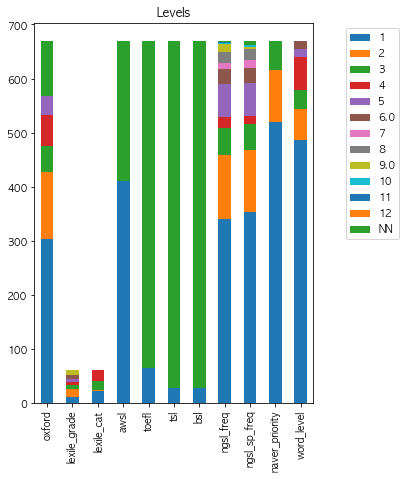

In [ ]:
fig = plt.figure(figsize=(20,15), dpi=80)
plt.rcParams["figure.figsize"]=(5, 7)
result.plot.bar(stacked=True)
plt.title('Levels')
plt.legend(bbox_to_anchor=(1.1, 1))


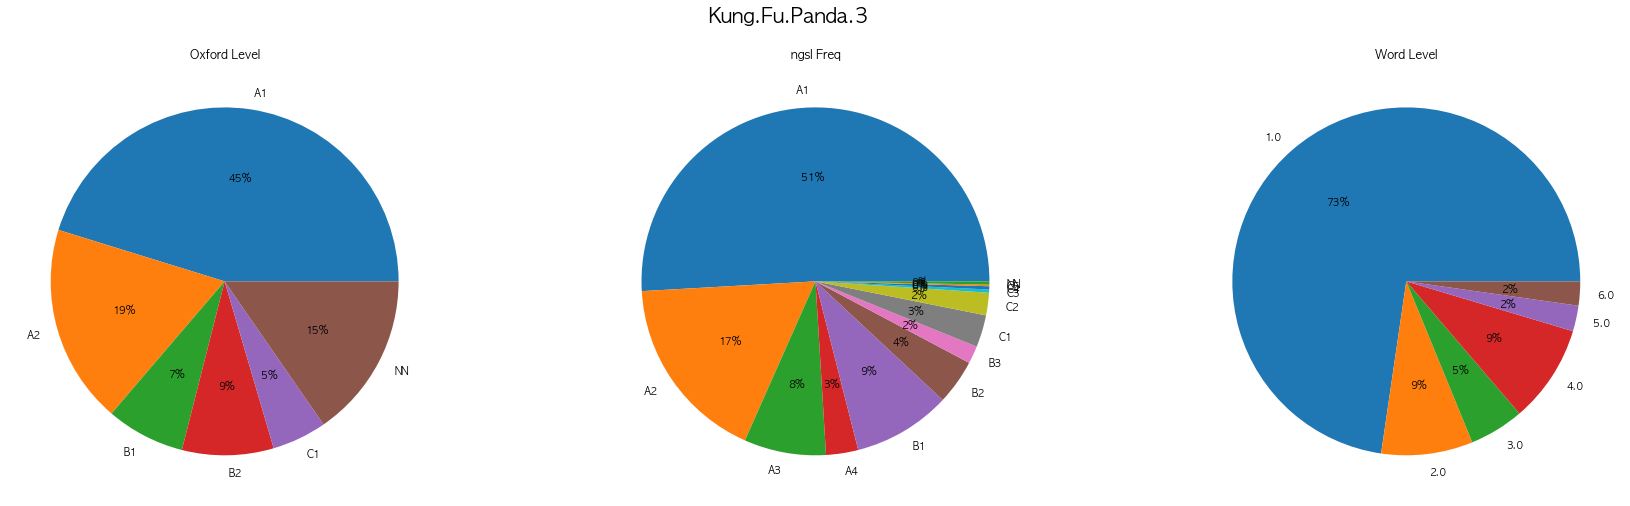

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30, 8), facecolor='white')
fig.suptitle(title, fontsize=20)
result = counts_df_headed_joined['oxford_level'].value_counts().sort_index()
axes[0].pie(result, labels=result.index, autopct = "%1.0f%%")
axes[0].set_title('Oxford Level')   

result = counts_df_headed_joined['ngsl_freq'].value_counts().sort_index()
axes[1].pie(result, labels=result.index,  autopct = "%1.0f%%")
axes[1].set_title('ngsl Freq')

result = counts_df_headed_joined['word_level'].value_counts().sort_index()
axes[2].pie(result, labels=result.index,  autopct = "%1.0f%%")
axes[2].set_title('Word Level')

# result = counts_df_headed_joined['ngsl_sp_freq'].value_counts().sort_index()
# axes[3].pie(result, labels=result.index,  autopct = "%1.0f%%")
# axes[3].set_title('ngsl sp Freq')

plt.show()